In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

import platform
print("platform.python_version() ", platform.python_version())

platform.python_version()  3.9.16


In [2]:
BASEDIR = './data/'
OUTDIR ='./out/'
file_name = os.listdir(BASEDIR)
file_dir = [os.path.join(BASEDIR, x) for x in file_name]
file_dir  # 显示前5个

['./data/.DS_Store',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230701.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230606.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230612.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230613.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230607.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230611.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230605.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230604.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230610.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230628.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230614.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230601.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230615.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230629.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230603.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230617.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230616.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230602.nc4',
 './data/MERRA2_400.tavg1_2d_slv_Nx.20230627.nc4',
 './data/M

In [3]:
def transform(filepath):
    data = Dataset(filepath, mode='r')
    # longitude and latitude
    lons = data.variables['lon']
    lats = data.variables['lat']
    lon, lat = np.meshgrid(lons, lats)
    # surface_skin_temperature
    TS = data.variables['TS']

    TS_nans = TS[:]
    # _FillValueTS = TS._FillValue
    # TS_nans[TS_nans == _FillValueTS] = np.nan
    ws_daily_avg = np.nanmean(TS, axis=0)
    pltData = ws_daily_avg

    # Set the figure size, projection, and extent
    fig = plt.figure(figsize=(8,4))
    ax = plt.axes(projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines(resolution="110m",linewidth=1)
    ax.gridlines(linestyle='--',color='black')

    # Plot windspeed:
    # Set contour levels, then draw the plot and a colorbar
    clevs = np.arange(0,19,1)
    plt.contourf(lon, lat, pltData, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    # plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
    cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    cb.set_label('K',size=12,rotation=0,labelpad=15)
    cb.ax.tick_params(labelsize=10)

    # fig.savefig(OUTDIR+'jjjj.png', format='png', dpi=120)


  0%|          | 0/1 [00:00<?, ?it/s]

./data/MERRA2_400.tavg1_2d_slv_Nx.20230701.nc4


100%|██████████| 1/1 [00:00<00:00,  1.26it/s]


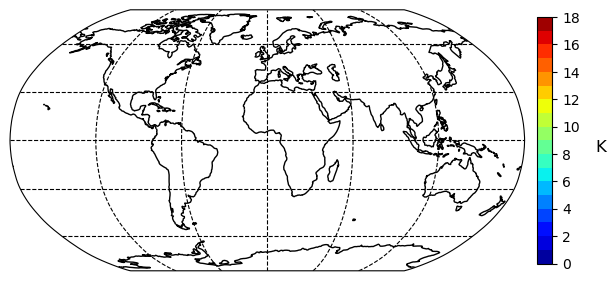

In [4]:
# for i in tqdm(range(1,len(file_dir)), desc='Progress', ncols=100, ascii=' ='):
for i in tqdm(range(1,2)):
    print(file_dir[i])
    transform(file_dir[i])
